#  DataFrames Methods

##  <font color='blue'> <b>Indexing, Slicing & Selection</b><font color='black'>

In [113]:
import numpy as np
import pandas as pd 
import seaborn as sns

In [70]:
data = {"Isim": ["Ali","Ayse","Fatma","Veli"], "boy cm": [170,160,170,180], "kilo-kg": [70,60,60,80]}


In [71]:
df = pd.DataFrame(data, index =["A","B","C","D"])
df

,Isim,boy cm,kilo-kg
A,Ali,170,70
B,Ayse,160,60
C,Fatma,170,60
D,Veli,180,80


In [72]:
df.Isim   # dot notation  SQL 

A      Ali
B     Ayse
C    Fatma
D     Veli
Name: Isim, dtype: object

In [73]:
df["Isim"]

A      Ali
B     Ayse
C    Fatma
D     Veli
Name: Isim, dtype: object

In [74]:
df["kilo-kg"]

A    70
B    60
C    60
D    80
Name: kilo-kg, dtype: int64

In [75]:
df["boy cm"]

A    170
B    160
C    170
D    180
Name: boy cm, dtype: int64

In [76]:
df[["boy cm", "kilo-kg"]]

,boy cm,kilo-kg
A,170,70
B,160,60
C,170,60
D,180,80


In [77]:
df["A":"B"]

,Isim,boy cm,kilo-kg
A,Ali,170,70
B,Ayse,160,60


In [78]:
df[0:2]

,Isim,boy cm,kilo-kg
A,Ali,170,70
B,Ayse,160,60


In [79]:
df["Isim"]["B"]

'Ayse'

In [80]:
df["A":"C"][["Isim","kilo-kg"]] # satir ve sutun getirdik 

,Isim,kilo-kg
A,Ali,70
B,Ayse,60
C,Fatma,60


 ## <font color='blue'> <b>Creating a New Column</b><font color='black'>

In [81]:
df

,Isim,boy cm,kilo-kg
A,Ali,170,70
B,Ayse,160,60
C,Fatma,170,60
D,Veli,180,80


In [82]:
df["BMI"] =df ["kilo-kg"] / (df["boy cm"] /100) ** 2 
df

,Isim,boy cm,kilo-kg,BMI
A,Ali,170,70,24.221453
B,Ayse,160,60,23.437500
C,Fatma,170,60,20.761246
D,Veli,180,80,24.691358


In [83]:
df["new"] =np.arange(4) # yeni bir sutun olusturma 
df

,Isim,boy cm,kilo-kg,BMI,new
A,Ali,170,70,24.221453,0
B,Ayse,160,60,23.437500,1
C,Fatma,170,60,20.761246,2
D,Veli,180,80,24.691358,3


## <font color = "blue" > <b> Removing Columns & Rows </b><font color ='black'>

**drop() yöntemi**, bir Pandas DataFrame'den belirtilen satır veya sütunu kaldırmak için kullanılır. 

**Eğer sütun kaldırılacaksa**, axis='columns' parametresi kullanılır ve belirtilen sütun kaldırılır. 

Benzer şekilde, 
**eğer bir satır kaldırılacaksa,** axis='index' parametresi kullanılır ve belirtilen satır kaldırılır.

Bu yöntem, DataFrame'den istenmeyen verileri kaldırmak ve veri manipülasyonu yapmak için sıkça kullanılır.

In [134]:
df.drop("new") # sutun kaldirilacaksa axis =1 belirtilmelidir. hata verir

KeyError: "['new'] not found in axis"

In [85]:
df.drop("new", axis=1) # kalici olarak silmez default inplace =False oldugundan silmez

,Isim,boy cm,kilo-kg,BMI
A,Ali,170,70,24.221453
B,Ayse,160,60,23.437500
C,Fatma,170,60,20.761246
D,Veli,180,80,24.691358


In [86]:
df

,Isim,boy cm,kilo-kg,BMI,new
A,Ali,170,70,24.221453,0
B,Ayse,160,60,23.437500,1
C,Fatma,170,60,20.761246,2
D,Veli,180,80,24.691358,3


In [87]:
df.drop("new", axis= 1, inplace=True)

In [88]:
df

,Isim,boy cm,kilo-kg,BMI
A,Ali,170,70,24.221453
B,Ayse,160,60,23.437500
C,Fatma,170,60,20.761246
D,Veli,180,80,24.691358


In [89]:
df.drop(["kilo-kg", "boy cm"], axis=1) # sutun silme 

,Isim,BMI
A,Ali,24.221453
B,Ayse,23.437500
C,Fatma,20.761246
D,Veli,24.691358


In [90]:
df.drop(["A", "B"]) # axis =0 yazmaya gerek yok

,Isim,boy cm,kilo-kg,BMI
C,Fatma,170,60,20.761246
D,Veli,180,80,24.691358


In [91]:
df

,Isim,boy cm,kilo-kg,BMI
A,Ali,170,70,24.221453
B,Ayse,160,60,23.437500
C,Fatma,170,60,20.761246
D,Veli,180,80,24.691358


## <font color='blue'> <b>Selecting Rows and Columns using .loc[ ] and iloc[ ]</b><font color='black'>
    
      

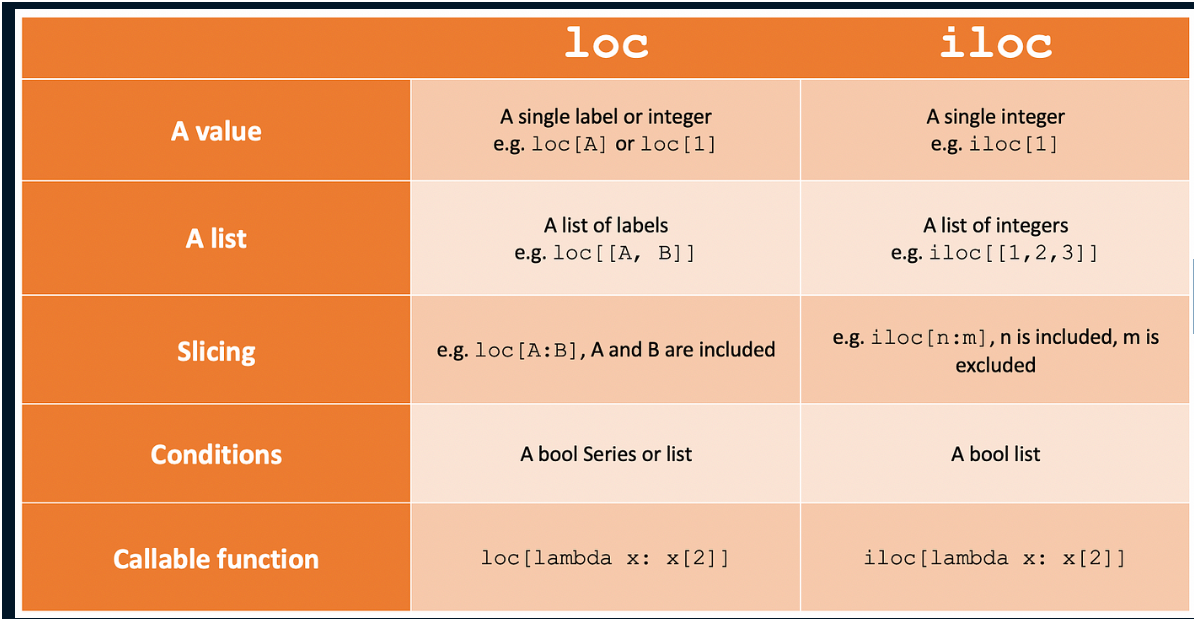

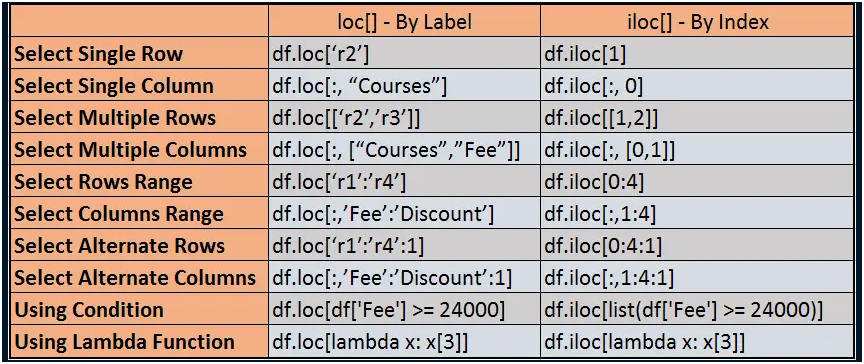

<b>loc: label-based

iloc: integer position-based

loc, "location"ın kısaltmasıdır ve satır ve sütun adlarına göre veriye erişmeyi sağlar.

loc, satır ve sütun etiketleri kullanarak belirli bir konumda bulunan veriye erişmek için kullanılır.

iloc, "integer location"ın kısaltmasıdır ve satır ve sütun numaralarına göre veriye erişmeyi sağlar.

iloc, satır ve sütun numaralarını kullanarak belirli bir konumda bulunan veriye erişmek için kullanılır.

1- Etiket veya dizin bağımsızlığı:Geleneksel indexleme yöntemleri, indekslerdeki değişikliklerden etkilenirken, "loc" ve "iloc" yöntemleri, konumlarına göre seçim yaparlar. Bu nedenle, veri setindeki indekslerdeki değişiklikler "loc" ve "iloc" yöntemleriyle yapılan seçimlerde bir sorun yaratmaz.

2-Hızlı performans: "iloc" fonksiyonu, sadece satır ve sütun dizinleri kullanarak veri seçimi yapar, bu nedenle loc fonksiyonuna göre daha hızlı çalışır. Bu özellik, büyük veri kümelerinde veya performans açısından kritik uygulamalarda faydalıdır.

3-Esneklik: Geleneksel indexleme yöntemleri, sadece sıfırdan başlayan, ardışık tam sayılar kullanarak indexlemeye izin verir. "loc" ve "iloc" yöntemleri ise etiket veya dizin değerlerine dayanır ve daha esnek bir seçim yapma imkanı sağlar. "loc" ve "iloc" fonksiyonları, veri çerçevesindeki satır ve sütunların bir arada kullanımına izin verir. Örneğin, belirli bir sütunda belirli bir satırdaki veriyi seçmek için hem satır hem de sütun etiketlerini veya dizinlerini kullanabilirsiniz. Bu esneklik, veri işleme işlemlerinde kullanışlıdır.

4-Daha okunaklı kod: "loc" ve "iloc" fonksiyonları, kodun daha okunaklı hale gelmesine yardımcı olur.</b>

In [92]:
data = np.arange(20).reshape(5,4)
df = pd.DataFrame(data, columns=["col1","col2", "col3", "col4"], index =range(1,6))
df 

,col1,col2,col3,col4
1,0,1,2,3
2,4,5,6,7
3,8,9,10,11
4,12,13,14,15
5,16,17,18,19


In [93]:
df.loc[3]

col1     8
col2     9
col3    10
col4    11
Name: 3, dtype: int32

In [94]:
df.loc[2:5] # son deger dahil 2 den basla 5 dahil getir label index degerine gore calisir.

,col1,col2,col3,col4
2,4,5,6,7
3,8,9,10,11
4,12,13,14,15
5,16,17,18,19


In [95]:
df.iloc[2:5]    # son index dahil degildir.default index degerlerine gore calisir.

,col1,col2,col3,col4
3,8,9,10,11
4,12,13,14,15
5,16,17,18,19


In [96]:
df.index = "a b c d e" .split()  # row index degerlerini degistirme 
df

,col1,col2,col3,col4
a,0,1,2,3
b,4,5,6,7
c,8,9,10,11
d,12,13,14,15
e,16,17,18,19


In [97]:
df.loc["b":"d"]

,col1,col2,col3,col4
b,4,5,6,7
c,8,9,10,11
d,12,13,14,15


In [98]:
# 5  loc ile getirelim 
df.loc ["b", "col2"]

5

In [99]:
# 5 i ilc ile getirelim
df.iloc[1,1]

5

In [100]:
df.iloc[[1,1]]

,col1,col2,col3,col4
b,4,5,6,7
b,4,5,6,7


In [101]:
df.iloc[[1],[1]]

,col2
b,5


In [102]:
df.loc["d":"g"  , ["col3"]  ] 

,col3
d,14
e,18


In [103]:
df

,col1,col2,col3,col4
a,0,1,2,3
b,4,5,6,7
c,8,9,10,11
d,12,13,14,15
e,16,17,18,19


In [104]:
# 8 ,12,16 getirelim 
df.iloc[2:6, 0]

c     8
d    12
e    16
Name: col1, dtype: int32

In [105]:
df.iloc[2:6, [0]]  # dataframe modundas getirdik

,col1
c,8
d,12
e,16


In [106]:
df.loc[["d", "e", "a"]][["col3", "col2"]]

,col3,col2
d,14,13
e,18,17
a,2,1


## Conditional Selection

In [107]:
df=pd.DataFrame(np.random.randn(5,4), index ="a b c d e".split(),columns=["A","B","C","D"])

In [108]:
df

,A,B,C,D
a,2.181194,-0.979984,-1.729117,-0.465466
b,0.719189,0.673490,-0.485974,-1.021014
c,0.174161,0.561802,0.649885,-0.885486
d,0.866670,0.639680,0.198072,-1.759931
e,-1.597789,-0.730052,-0.644538,-0.462268


In [109]:
df > 0 
df

,A,B,C,D
a,2.181194,-0.979984,-1.729117,-0.465466
b,0.719189,0.673490,-0.485974,-1.021014
c,0.174161,0.561802,0.649885,-0.885486
d,0.866670,0.639680,0.198072,-1.759931
e,-1.597789,-0.730052,-0.644538,-0.462268


In [110]:
df[df > 0]

,A,B,C,D
a,2.181194,NaN,NaN,NaN
b,0.719189,0.673490,NaN,NaN
c,0.174161,0.561802,0.649885,NaN
d,0.866670,0.639680,0.198072,NaN
e,NaN,NaN,NaN,NaN


In [111]:
# df icerisnde kosullari saglayan degerleri dondurebilir miyim

df[df["B"] > 0]

,A,B,C,D
b,0.719189,0.673490,-0.485974,-1.021014
c,0.174161,0.561802,0.649885,-0.885486
d,0.866670,0.639680,0.198072,-1.759931


In [112]:
df.loc[df["B"] > 0]

,A,B,C,D
b,0.719189,0.673490,-0.485974,-1.021014
c,0.174161,0.561802,0.649885,-0.885486
d,0.866670,0.639680,0.198072,-1.759931


  <p style="background-color:green;font-family:newtimeroman;font-size:100%;color:white;text-align:center;border-radius:20px 20px;"><b>    </b></p>

In [114]:
df = sns.load_dataset('titanic')
df 

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [115]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [116]:
df.tail() # son 5 satiri getirir default 5 

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [117]:
df.tail(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
881,0,3,male,33.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
882,0,3,female,22.0,0,0,10.5167,S,Third,woman,False,NaN,Southampton,no,True
883,0,2,male,28.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,no,True


In [118]:
df.sample() # default 1 satir getirir her run etmede degisir

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
24,0,3,female,8.0,3,1,21.075,S,Third,child,False,NaN,Southampton,no,False


In [121]:
df.sample(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
189,0,3,male,36.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
280,0,3,male,65.0,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,no,True
574,0,3,male,16.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
137,0,1,male,37.0,1,0,53.1000,S,First,man,True,C,Southampton,no,False
530,1,2,female,2.0,1,1,26.0000,S,Second,child,False,NaN,Southampton,yes,False


In [120]:
df.shape # kac satir ve sutundan olustugunu gosterir

(891, 15)

In [122]:
df.info() # data hk.ozet bilgiler getirir

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [123]:
df.describe() # istatristiki bilgiler getirir

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [124]:
df.describe().T # istatistiki bilgileri duzenli getirir Transpoz satirlari sutunlara sutunlari satirlara getirir.

,count,mean,std,min,25%,50%,75%,max
survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
sibsp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [125]:
df.describe(include="all").T 

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
sibsp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292
embarked,889,3,S,644,NaN,NaN,NaN,NaN,NaN,NaN,NaN
class,891,3,Third,491,NaN,NaN,NaN,NaN,NaN,NaN,NaN
who,891,3,man,537,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## <font color='blue'> <b>reset_index() & set_index()</b><font color='black'>

reset_index(), DataFrame indeksini sıfırlar ve bunun yerine default hali kullanır.

set_index(), DataFrame'in belirtilen bir sütununu veya sütunlarını, DataFrame'in yeni bir indeksi olarak ayarlar.

In [126]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [127]:
df.set_index("who") # who sutunu yeni index oldu who 


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,adult_male,deck,embark_town,alive,alone
who,,,,,,,,,,,,,,
man,0,3,male,22.0,1,0,7.2500,S,Third,True,NaN,Southampton,no,False
woman,1,1,female,38.0,1,0,71.2833,C,First,False,C,Cherbourg,yes,False
woman,1,3,female,26.0,0,0,7.9250,S,Third,False,NaN,Southampton,yes,True
woman,1,1,female,35.0,1,0,53.1000,S,First,False,C,Southampton,yes,False
man,0,3,male,35.0,0,0,8.0500,S,Third,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
man,0,2,male,27.0,0,0,13.0000,S,Second,True,NaN,Southampton,no,True
woman,1,1,female,19.0,0,0,30.0000,S,First,False,B,Southampton,yes,True
woman,0,3,female,NaN,1,2,23.4500,S,Third,False,NaN,Southampton,no,False


In [128]:
df.set_index("who",drop=False) # bu sekilde yazilirsa who iki yerdede yazilir satir ve sutunlarda 

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
who,,,,,,,,,,,,,,,
man,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
woman,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
woman,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
woman,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
man,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
man,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
woman,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
woman,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False


In [129]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [130]:
df.set_index("who", drop=False, inplace=True) # inplace =True olursa degisiklikler kalici hale gelir.
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
who,,,,,,,,,,,,,,,
man,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
woman,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
woman,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
woman,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
man,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
man,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
woman,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
woman,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False


In [131]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
who,,,,,,,,,,,,,,,
man,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
woman,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
woman,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
woman,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
man,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
man,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
woman,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
woman,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False


In [132]:
df.reset_index(drop=True)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True
